# Retention Study - Figuring Out Which Employees May Quit

### Table of Contents
    1. Introduction
    2. Exploratory Data Analysis
    3. Conclusions


### Introduction
For this project, I decided to analyse the Employee Satisfaction dataset found on Kaggle using the CRISP-DM Process

    1. Business Understanding
    2. Data Understanding
    3. Prepare Data
    4. Data Modeling
    5. Evaluate the Results
    6. Deploy

### Business Understanding

Job hopping is very common in the economic nowadays. With a human resource, knowing which employee may left the company can help them:

    - Make a plan to retain that employee
    - Prepare for recruiting new employee

To understand these questions, I will use the data of 15,000 employees who have left in a company. Then, we will have a model to predict the leave of an employee.

### Exploratory Data

##### Gather Data

In [1]:
import pandas as pd
#load file and read 5 first rows
file_name = "hr_data.csv"
hr_df = pd.read_csv(file_name)
hr_df.head()

,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [2]:
# View the bottom 5 rows
hr_df.tail()

,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_monthly_hours  14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


View which columns are categorical

In [4]:
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

Display values in categorical columns

In [5]:
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


Check number of rows, columns and shape of our dataset

In [6]:
len(hr_df)

14999

In [7]:
len(hr_df.columns)

9

In [8]:
hr_df.shape

(14999, 9)

##### Gather Evaluation and Employee Satisfaction Data

In [9]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


Check shape of data

In [10]:
emp_satis_eval.shape

(14999, 3)

##### Merge or Join 2 Tables

2 tables are merged into 1 for our evaluation.

In [11]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


##### Clean Data

In [12]:
# Check if we have any NULL values in our dataset
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


Describe the Dataframe

In [13]:
main_df.describe()

,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Fill in the missing values:
    
    - Dropping all rows with missing values will make our dataset smaller, which makes the model has worse pattern recognition and smaller testset.
    - Filling NULL values with median make our data more bias, which may shift the distribution to another value, decrease the kurtosis, or make the data skewness
    - Filling NULL values with the mean values of column will only increase the kurtosis of data.

Therfore, we fill in missing values with mean values of the columns.

In [14]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

C:\Users\huyho\AppData\Local\Temp/ipykernel_7528/2431407480.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df.fillna(main_df.mean(), inplace=True)


,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


Check a record which have NULL values earlier

In [15]:
main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


Removing employee ID since it is not a factor of our evaluation.

In [16]:
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


Collect the sum, mean of other fields and number of values in department columns

In [17]:
main_df_final.groupby('department').sum()

,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [18]:
main_df_final.groupby('department').mean()

,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [19]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

##### Display Correlation Matrix

A correlation matrix can illustrate the corelation between the data variables. It can help us got a summarize view of data, as a diagnostic for further analyses.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


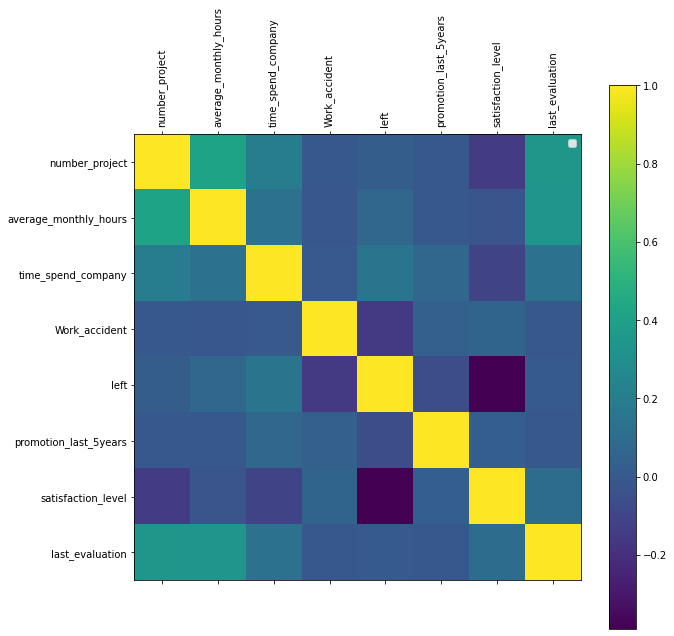

In [20]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

With the correlation matrix, there is not much affection between these variables.

## Prepare Dataset for Machine Learning

In this section, we will prepare our data for Machine Learning approach

We need to perform the One Hot Encoding on Categorical columns, so that we can use the dataset for further analysis.

In [21]:
categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


Check number of columns in the dataset after One Hot Encoding

In [22]:
len(main_df_final.columns)

19

How many employees in the dataset have left?

In [23]:
len(main_df_final.loc[main_df_final['left'] == 1])

3571

Check data after the One Hot Encoding process

In [24]:
main_df_final.head()

,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [25]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_monthly_hours   14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

### Process Machine Learning

In this part, we will split our dataset into a ratio of 70:30 for training and testing data to create Machine Learning model with 2 methods

    - Logistic Regression
    - Random Forest Classifier

Create X and y dataset for our training model

In [26]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values

Split it to a 70:30 Ratio Train:Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The data need to be normalized before using in Machine Learning

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix.
# This is equivalent to fit followed by the transform, but more efficiently implemented.

Check training dataset

In [29]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.965279,0.976336,-0.340701,-0.410808,-0.146636,1.327219,-0.725064,-0.236920,-0.228506,4.294484,-0.209641,-0.242474,-0.251804,-0.613054,-0.417909,-0.474133,1.029289,-0.868458
1,-0.641708,-1.100922,-1.030979,2.434227,-0.146636,-0.362359,-1.310255,-0.236920,4.376258,-0.232857,-0.209641,-0.242474,-0.251804,-0.613054,-0.417909,-0.474133,-0.971545,1.151466
2,-0.641708,-1.140869,-1.030979,-0.410808,-0.146636,0.683571,-0.959140,4.220831,-0.228506,-0.232857,-0.209641,-0.242474,-0.251804,-0.613054,-0.417909,-0.474133,1.029289,-0.868458
3,-0.641708,1.355835,0.349577,-0.410808,-0.146636,-0.684183,-1.134698,-0.236920,-0.228506,-0.232857,-0.209641,-0.242474,-0.251804,-0.613054,-0.417909,2.109115,1.029289,-0.868458
4,1.768773,1.016283,0.349577,-0.410808,-0.146636,-2.011709,0.737915,-0.236920,-0.228506,-0.232857,-0.209641,-0.242474,-0.251804,-0.613054,-0.417909,2.109115,1.029289,-0.868458


In [30]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-4.060631e-18,7.376813e-17,-1.414453e-16,1.091295e-16,3.519213e-17,2.249725e-14,2.971570e-14,-4.703564e-17,1.055764e-16,-2.368701e-17,-5.481852e-17,5.177304e-17,-1.488898e-17,5.414175e-18,-3.722245e-18,-4.703564e-17,5.955592e-17,-6.090946e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.445202e+00,-2.099604e+00,-1.030979e+00,-4.108080e-01,-1.466364e-01,-2.092165e+00,-2.071005e+00,-2.369202e-01,-2.285057e-01,-2.328568e-01,-2.096413e-01,-2.424745e-01,-2.518040e-01,-6.130542e-01,-4.179086e-01,-4.741326e-01,-9.715448e-01,-8.684578e-01
25%,-6.417082e-01,-9.011859e-01,-3.407012e-01,-4.108080e-01,-1.466364e-01,-6.841832e-01,-9.006212e-01,-2.369202e-01,-2.285057e-01,-2.328568e-01,-2.096413e-01,-2.424745e-01,-2.518040e-01,-6.130542e-01,-4.179086e-01,-4.741326e-01,-9.715448e-01,-8.684578e-01
50%,1.617855e-01,-2.234597e-02,-3.407012e-01,-4.108080e-01,-1.466364e-01,1.203779e-01,3.568539e-02,-2.369202e-01,-2.285057e-01,-2.328568e-01,-2.096413e-01,-2.424745e-01,-2.518040e-01,-6.130542e-01,-4.179086e-01,-4.741326e-01,-9.715448e-01,-8.684578e-01
75%,9.652791e-01,8.764676e-01,3.495770e-01,-4.108080e-01,-1.466364e-01,8.042548e-01,9.134729e-01,-2.369202e-01,-2.285057e-01,-2.328568e-01,-2.096413e-01,-2.424745e-01,-2.518040e-01,1.631177e+00,-4.179086e-01,-4.741326e-01,1.029289e+00,1.151466e+00
max,2.572266e+00,2.174754e+00,4.491246e+00,2.434227e+00,6.819589e+00,1.568588e+00,1.674222e+00,4.220831e+00,4.376258e+00,4.294484e+00,4.770052e+00,4.124146e+00,3.971343e+00,1.631177e+00,2.392868e+00,2.109115e+00,1.029289e+00,1.151466e+00


### Train a Logistic Regression Model

In [31]:
# import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# create the Logistic Regression model with lbfgs solver
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# use the model to predict on the test data
predictions = model.predict(X_test)

# Showing the accuracy, confusion matrix and classification report of the model
print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print("Confusion matrix")
print(confusion_matrix(y_test, predictions))
print("Classification report")
print(classification_report(y_test, predictions))

Accuracy 80.18%
Confusion matrix
[[3185  271]
 [ 621  423]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3456
           1       0.61      0.41      0.49      1044

    accuracy                           0.80      4500
   macro avg       0.72      0.66      0.68      4500
weighted avg       0.78      0.80      0.79      4500



Let's test the model with a new data.

In [32]:
# Create Test Input
input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)
print(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)
print(input_data)

[[-0.64170817 -0.82129133  1.03985528 -0.41080801  6.8195885  -0.4428149
  -1.25173623 -0.23692018 -0.22850574 -0.23285685 -0.20964133  4.12414553
  -0.25180398 -0.61305416 -0.41790857 -0.47413256 -0.97154479  1.15146648]]
[[-0.64170817 -0.82129133  1.03985528 -0.41080801  6.8195885  -0.4428149
  -1.25173623 -0.23692018 -0.22850574 -0.23285685 -0.20964133  4.12414553
  -0.25180398 -0.61305416 -0.41790857 -0.47413256 -0.97154479  1.15146648]]


C:\Users\huyho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign

In [33]:
model.predict(input_data)

array([0], dtype=int64)

Check the probabilities of belonging to either class

In [34]:
model.predict_proba(input_data)

array([[0.86312647, 0.13687353]])

The model returns a good accuracy with 79%. That can be used in the reality, but may have some errors.

### Try with Random Forest Classifier

In order to achieve a better predict model, we try with the Random Forest Classifier. The input datasets are the same as the above model.

In [35]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# create the Random Forest Classfider model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# use the model to predict on the testing dataset
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

# Showing the accuracy, confusion matrix and classification report of the new model
print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print("Confusion matrix")
print(confusion_matrix(y_test, predictions))
print("Classification report")
print(classification_report(y_test, predictions))

Accuracy 98.93%
Confusion matrix
[[3448    8]
 [  40 1004]]
Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3456
           1       0.99      0.96      0.98      1044

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



After getting the accuracy of nearly 99%, we want to know which factor affect most to the resign decision of an employee.

In [36]:
# show first 5 rows of dataset
hr_df.head()

,employee_id,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [37]:
# get columns name of the new dataframe
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_monthly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [38]:
# showing the importance number of a column/factor to the resignate decision
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.329882
0,0.179176
2,0.177687
1,0.148055
6,0.122526
3,0.008701
16,0.007929
17,0.004534
15,0.003514
13,0.003264


This result shows that the satisfaction level is the most important key for an employee to retain or resign from a job.

### Can Deep Learning Make a Difference?

After the Machine Learning showing a good result, we wonder if Deep Learning can have an even better model for our prediction.

We will start with basic Deep Learning method, then going deeper.

In [39]:
# import necessary libraries
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# create the Sequential model
model = Sequential()

# adding layer for the Deep Learning
model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

# compile the accuracy 
model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

Display Model Summary and Show Parameters

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Start Training Our Classifier 

In [41]:
# setting the batch size and epochs for training
batch_size = 10
epochs = 25

# fit the dataset into the model
history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

# Score the model and showing the loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 5s 3ms/step - loss: 0.4434 - accuracy: 0.7579 - val_loss: 0.3429 - val_accuracy: 0.7680
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3211 - accuracy: 0.8529 - val_loss: 0.2867 - val_accuracy: 0.8940
Epoch 3/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2812 - accuracy: 0.9092 - val_loss: 0.2595 - val_accuracy: 0.9087
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2599 - accuracy: 0.9167 - val_loss: 0.2427 - val_accuracy: 0.9160
Epoch 5/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9220 - val_loss: 0.2330 - val_accuracy: 0.9178
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2363 - accuracy: 0.9263 - val_loss: 0.2227 - val_accuracy: 0.9216
Epoch 7/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2279 - accuracy: 0.9292 - val_loss: 0.2152 - val_accuracy:

Plotting our loss chart

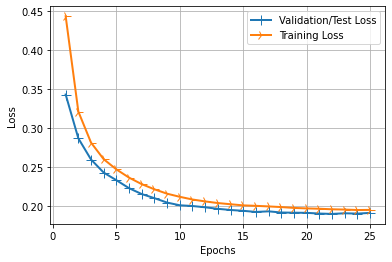

In [42]:
# import matplotlib for plotting
import matplotlib.pyplot as plt

# calculate the loss vakues of new model, then plot it
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Plotting our accuracy chart

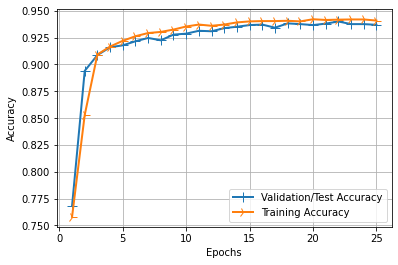

In [43]:
# calculate the accuracy vakues of new model, then plot it
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

The loss and accuracy charts show that the model have a quite good stats, with about 93% of accuracy and 20% of loss.

##### Display the Classification Report and Confusion Matrix

In [44]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print("Confusion matrix")
print(confusion_matrix(y_test, predictions))
print("Classification report")
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 1ms/step
Accuracy 93.69%
Confusion matrix
[[3283  173]
 [ 111  933]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3456
           1       0.84      0.89      0.87      1044

    accuracy                           0.94      4500
   macro avg       0.91      0.92      0.91      4500
weighted avg       0.94      0.94      0.94      4500



# Let's make a Deeper Model

For a deeper model, we need to add more hidden layers, which will help the training and testing process more accuracy.

In [45]:
# import necessary libraries
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# create hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# create hidden Layer 2
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# create hidden Layer 3
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 270)               5130      
                                                                 
 dropout (Dropout)           (None, 270)               0         
                                                                 
 dense_3 (Dense)             (None, 180)               48780     
                                                                 
 dropout_1 (Dropout)         (None, 180)               0         
                                                                 
 dense_4 (Dense)             (None, 90)                16290     
                                                                 
 dense_5 (Dense)             (None, 1)                 91        
                                                                 
Total params: 70,291
Trainable params: 70,291
Non-trai

In [46]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

We need to train our Deeper Model, then re-draw the loss and accuracy charts, and come to the final result.

In [47]:
# setting batch size and epochs number
batch_size = 10
epochs = 25

# fit dataset into new model
history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

# Score the model and showing the loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.6696 - accuracy: 0.9038 - val_loss: 0.2774 - val_accuracy: 0.9449
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2781 - accuracy: 0.9397 - val_loss: 0.2443 - val_accuracy: 0.9529
Epoch 3/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2613 - accuracy: 0.9409 - val_loss: 0.2395 - val_accuracy: 0.9473
Epoch 4/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.2512 - accuracy: 0.9450 - val_loss: 0.2444 - val_accuracy: 0.9458
Epoch 5/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2483 - accuracy: 0.9440 - val_loss: 0.2400 - val_accuracy: 0.9500
Epoch 6/25
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2418 - accuracy: 0.9469 - val_loss: 0.2335 - val_accuracy: 0.9440
Epoch 7/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2406 - accuracy: 0.9458 - val_loss: 0.2260 - val_accuracy:

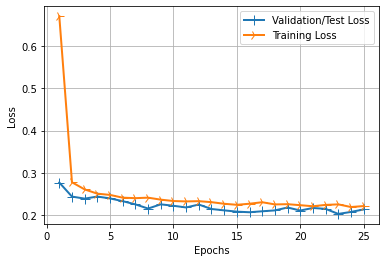

In [48]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

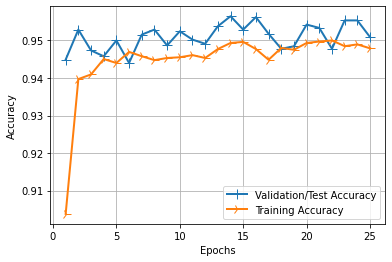

In [49]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print("Confusion matrix")
print(confusion_matrix(y_test, predictions))
print("Classification report")
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 2ms/step
Accuracy 95.09%
Confusion matrix
[[3399   57]
 [ 164  880]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3456
           1       0.94      0.84      0.89      1044

    accuracy                           0.95      4500
   macro avg       0.95      0.91      0.93      4500
weighted avg       0.95      0.95      0.95      4500



The loss and accuracy charts show that deeper model have a quicker response than the old model. But it might have some unstability points.

# Conclusion

The project helps us to create some models to predict the leave of an employee, based on the Employee Satisfaction dataset.

    - The best model for our input data is the Random Forest Classifier - a Machine Learning model.
    - Sometimes, Deep Learning might have a worse result, but should always be considered.
